In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка и первичный анализ данных

In [2]:
data = pd.read_csv('winemag-data-130k-v2.csv')
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
data.shape

(129971, 14)

In [4]:
data.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [5]:
data.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [6]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 129971


In [7]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((129971, 14), (22387, 14))

In [8]:
total_count = data_new_2.shape[0]
print('Всего строк после удаления: {}'.format(total_count))

Всего строк после удаления: 22387


In [9]:
cat_temp_data = data_new_2[['province']]
cat_temp_data.head()

,province
4,Oregon
10,California
23,California
25,California
35,Oregon


In [10]:
cat_temp_data['province'].unique()

array(['Oregon', 'California', 'Washington', 'New York'], dtype=object)

In [11]:
cat_temp_data[cat_temp_data['province'].isnull()].shape

(0, 1)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data_new_2['province'])

In [14]:
np.unique(cat_enc_le)

array([0, 1, 2, 3])

In [15]:
le.inverse_transform([0, 1, 2, 3])

array(['California', 'New York', 'Oregon', 'Washington'], dtype=object)

In [16]:
data_new_2.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


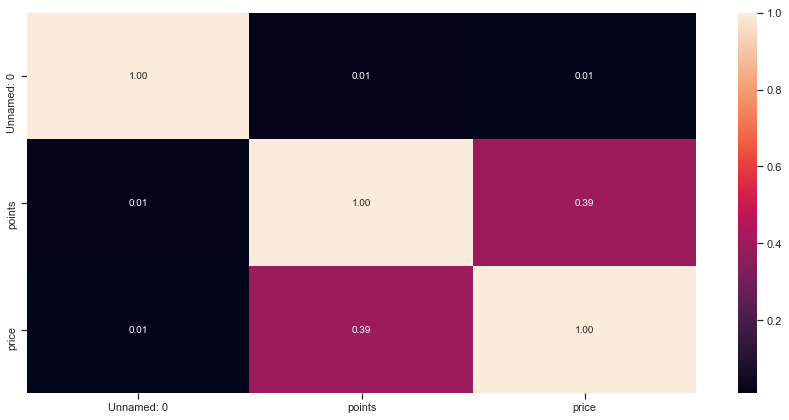

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data_new_2.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

# Простая реализация алгоритма

In [49]:
from enum import Enum
class PredictionType(Enum):
    CLASSIFICATION = 1
    REGRESSION = 2

In [50]:
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np

class SimpleKNN:
    
    def fit(self, X_train: np.matrix, y_train: np.ndarray):
        """
        Метод обучения, который фактически не учится, 
        а только запоминает обучающую выборку.
        Входные параметры:
        X_train - обучающая выборка (матрица объект-признак)
        y_train - обучающая выборка (вектор целевого признака)
        Возвращаемое значение: нет
        """
        #Сохраняем параметры в переменных класса
        self._X_train = X_train
        self._y_train = y_train
          
    def eucl_dist(self, p: np.ndarray, q: np.ndarray) -> float:
        """
        Вычисление Евклидова расстояния - https://en.wikipedia.org/wiki/Euclidean_distance 
        Входные параметры:
        p, q - вектора в n-мерном пространстве признаков
        """
        return sum([(pi - qi) ** 2 for pi, qi in zip (p, q)])
            
            
    def predict_for_single_object(self, K: int, \
                prediction_type: PredictionType, \
                X_o: np.ndarray, \
                verbose = True) -> np.ndarray:
        """
        Метод предсказания для одного объекта.
        Входные параметры:
        K - гиперпараметр, количество соседей 
        prediction_type - классификация или регрессия 
        X_o - строка матрицы объект-признак, соответствующая объекту
        verbose - флаг детального вывода
        Возвращаемое значение: предсказанное значение целевого признака
        """
        
        # список соседей
        neighbors_list = []
        # *** Находим ближайшие точки ***
        # Перебираем все точки обучающей выборки
        for i in range(self._X_train.shape[0]):
            # получаем текущую точку
            data_train_current_x = [x for x in self._X_train[['points','province']].iloc[i]]
            # и значение ее y
            data_train_current_y = self._y_train[i]
            # вычисляем расстояние
            dist = self.eucl_dist(X_o, data_train_current_x)
            # сохраняем в список соседей
            temp_res = (data_train_current_y, dist, data_train_current_x)
            neighbors_list.append(temp_res)
        # *** сортируем список соседей по возрастанию расстояния *** 
        # в кортеже элементы следуют в порядке (0,1,2), сортируем по первому элементу 
        neighbors_list_sorted = sorted(neighbors_list, key=itemgetter(1))
        if verbose:
            print('**************************************')
            print('Проверяемая точка: ', X_o)
            print('Вывод отсортированного списка соседей:')    
            dist_list = []
            for cur_y, cur_dist, _ in neighbors_list_sorted:
                print('y={0}, расстояние={1:.2f}'.format(cur_y, cur_dist))
                dist_list.append(cur_dist)
            print()
            print('Вывод расстояния для отсортированного списка соседей:')    
            plt.plot(dist_list)
            plt.show()
        # Оставим только K ближайших соседей
        K_neighbors_list_sorted = neighbors_list_sorted[:K]
        if verbose:
            print('Вывод К ближайших соседей:')
            x1_list = []
            x2_list = []
            for cur_y, cur_dist, temp_x_1_2 in K_neighbors_list_sorted:
                temp_x1, temp_x2 = temp_x_1_2
                x1_list.append(temp_x1)
                x2_list.append(temp_x2)
                print('y={0}, расстояние={1:.2f}'.format(cur_y, cur_dist))
            print()
            print('Визуализация К ближайших соседей:')
            plt.plot(self._X_train['points'], self._X_train['province'], 'b.', \
                     x1_list, x2_list,  'g*', \
                    [X_o[0]], [X_o[1]], 'ro')
            plt.show()   
        # Результат - классификация или регрессия
        if prediction_type == PredictionType.REGRESSION:
            # используем numpy для вычисления среднего значения
            arr = np.array([x for x,_,_ in K_neighbors_list_sorted])
            # возвращаем среднее значение
            return np.mean(arr)          
        elif prediction_type == PredictionType.CLASSIFICATION:
            k_y_list = [y for y,_,_ in K_neighbors_list_sorted]
            # группируем с количеством метки классов,
            # соответствующие K ближайшим соседям
            k_y_list_grouped_temp = np.unique(k_y_list, return_counts=True)
            k_y_list_grouped = [[key, cnt] for key, cnt in zip(k_y_list_grouped_temp[0], k_y_list_grouped_temp[1])]
            # сортируем по количеству по убыванию
            k_y_list_grouped_sorted = sorted(k_y_list_grouped, key=itemgetter(1), reverse=True)
            if verbose:
                print('Классы, соответствующие К ближайшим соседям:')
                for i in k_y_list_grouped_sorted:
                    print('класс={0}, количество элементов={1}'.format(i[0], i[1]))
            # возвращаеv метку класса из первой строки отсортированного массива
            # то есть того класса, к которому принадлежит наибольшее количество соседей
            return k_y_list_grouped_sorted[0][0]
        else:
            raise Exception('Неизвестный тип предсказания')
                   
    
    def predict(self, K: int, \
                prediction_type: PredictionType, \
                X_test: np.matrix, 
                verbose = True) -> np.ndarray:
        """
        Метод предсказания.
        Входные параметры:
        K - гиперпараметр, количество соседей 
        prediction_type - классификация или регрессия 
        X_test - тестовая выборка (матрица объект-признак)
        Возвращаемое значение: предсказанный вектор целевого признака
        """
        # Перебираем все точки тестовой выборки
        test_data_temp = []
        for i in range(X_test.shape[0]):
            # получаем текущую точку
            data_test_current_x = [x for x in X_test.iloc[i]]
            test_data_temp.append(data_test_current_x)       
        return [self.predict_for_single_object(K=K, \
                prediction_type=prediction_type, \
                X_o=i, verbose=verbose) for i in test_data_temp]
    

In [51]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [52]:
target = data_new_2.price
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    data_new_2, target, test_size=0.2, random_state=1)

In [53]:
data_X_train.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
127201,127201,US,"This wine, from the producer's estate vineyard...",Animo,94,85.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Michael Mondavi Family Estate 2012 Animo Caber...,Cabernet Sauvignon,Michael Mondavi Family Estate
72143,72143,US,"Full-bodied and expressively juicy, this is an...",No. 11,90,65.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,JCB 2012 No. 11 Pinot Noir (Sonoma Coast),Pinot Noir,JCB
8806,8806,US,"Smooth and soft in the mouth, this has rich ch...",Stillwater Creek Vineyard,87,38.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Merry Cellars 2011 Stillwater Creek Vineyard M...,Mourvèdre-Syrah,Merry Cellars
125450,125450,US,Named after the New York City neighborhood whe...,Hell's Kitchen,93,54.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Jada Vineyard & Winery 2012 Hell's Kitchen Red...,Rhône-style Red Blend,Jada Vineyard & Winery
1117,1117,US,Rich cherry and spicy black pepper introduce t...,Reserve,90,56.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Daou 2012 Reserve Zinfandel (Paso Robles),Zinfandel,Daou


In [54]:
data_X_test.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
9553,9553,US,"This is a wildly exotic wine, vibrantly abuzz ...",La Cruz Vineyard,93,45.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Keller 2014 La Cruz Vineyard Pinot Noir (Sonom...,Pinot Noir,Keller
3708,3708,US,Perfectly capturing the AVA's signature mix of...,Seven Springs Vineyard,91,50.0,Oregon,Eola-Amity Hills,Willamette Valley,Paul Gregutt,@paulgwine,Evening Land 2012 Seven Springs Vineyard Pinot...,Pinot Noir,Evening Land
2451,2451,US,"Serious and concentrated, this is a big and bo...",Left Tusque,90,45.0,California,Alexander Valley,Sonoma,Jim Gordon,@gordone_cellars,Sanglier Cellars 2012 Left Tusque Cabernet Sau...,Cabernet Sauvignon,Sanglier Cellars
67900,67900,US,The winery calls the 2007 Tikka's “less exuber...,Tikka's Run,88,19.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Lemelson 2007 Tikka's Run Pinot Gris (Willamet...,Pinot Gris,Lemelson
78011,78011,US,"This displays the big, chunky, California-styl...",Antsy Pants,91,48.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Love & Squalor 2012 Antsy Pants Pinot Noir (Wi...,Pinot Noir,Love & Squalor


In [55]:
data_y_train.head()

127201    85.0
72143     65.0
8806      38.0
125450    54.0
1117      56.0
Name: price, dtype: float64

In [56]:
data_y_test.head()

9553     45.0
3708     50.0
2451     45.0
67900    19.0
78011    48.0
Name: price, dtype: float64

In [57]:
data_X_train, data_X_test, data_y_train, data_y_test
total_count_data_X_train = data_X_train.shape[0]
total_count_data_X_test = data_X_test.shape[0]
total_count_data_y_train = data_y_train.shape[0]
total_count_data_y_test = data_y_test.shape[0]
print('Всего строк train: {}, test: {} '.format(total_count_data_X_train, total_count_data_X_test))

Всего строк train: 17909, test: 4478 


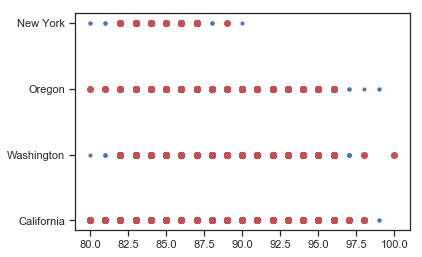

In [58]:
plt.plot(data_X_train['points'], data_X_train['province'], 'b.', \
         data_X_test['points'], data_X_test['province'], 'ro')
plt.show()

# Фаза обучения

In [59]:
simple_knn_regr = SimpleKNN()

In [60]:
simple_knn_regr.fit(data_X_train[['points','province']], data_X_train['price'])

In [61]:
data_X_train[['points','province']]

,points,province
127201,94,California
72143,90,California
8806,87,Washington
125450,93,California
1117,90,California
12260,92,California
89023,90,California
108861,87,California
62768,91,California
43253,85,California


In [62]:
 data_X_train[['price']]

,price
127201,85.0
72143,65.0
8806,38.0
125450,54.0
1117,56.0
12260,28.0
89023,32.0
108861,29.0
62768,50.0
43253,12.0


In [63]:
# первая строка тестовой выборки
data_test_0 = [x for x in data_X_test[['points','province']].iloc[0]]
data_test_0

[93, 'California']

In [64]:
# построим предсказание для одного объекта (регрессия)
#simple_knn_regr_0 = simple_knn_regr.predict_for_single_object(K=5, \
 #                         prediction_type=PredictionType.REGRESSION, \
  #                        X_o=data_test_0)
#simple_knn_regr_0

In [65]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [66]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifierObj

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [68]:
KNeighborsClassifierObj.fit(data_X_train[['points','province']], data_X_train['price'])
KNeighborsClassifierObj.predict(data_X_test[['points','province']])

ValueError: could not convert string to float: 'California'